# Interactive Restaurant Supply Chain Optimizer

This notebook provides an interactive and educational walkthrough of a comprehensive restaurant supply chain optimization system. "Interactive" means you can actively engage with the code: modify input parameters, execute individual optimization steps, and immediately observe the results through both textual summaries and visual charts. "Educational" signifies that each step is designed to clearly demonstrate the underlying algorithms and their impact on business decisions.

You will explore key optimization areas including:
*   **Route Optimization:** Finding the most efficient delivery paths.
*   **Menu Planning:** Strategically selecting menu items to meet objectives within budget.
*   **Demand Simulation:** Forecasting customer demand using probabilistic methods.
*   **Inventory Management:** Tracking and updating stock levels.
*   **Order Processing:** Simulating the handling of customer orders.

By experimenting with different scenarios, you'll gain insights into how various optimization techniques can be applied to improve the efficiency and profitability of restaurant operations.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
from restaurant_optimizer import RestaurantOptimizer
import time

## 1. Initialize the Optimizer

This initial step is crucial as it involves setting up the `RestaurantOptimizer` class, the central component that manages all data and orchestrates the various optimization algorithms. Here, you can define the foundational parameters of your restaurant chain model.

Customizable parameters include:
*   **Restaurant Network:** Define individual restaurants, including their unique IDs, names, geographical locations (latitude and longitude), daily operational budgets, and storage capacities for inventory.
*   **Menu Items:** Specify the list of food items offered across the chain, detailing their costs, calories (or other nutritional information), and any other relevant attributes.
*   **Initial Inventory:** Set the starting stock levels for each menu item at each restaurant.

Modifying these parameters allows you to simulate different business scenarios and observe how the optimizer adapts its strategies.

In [2]:
# Example: Initialize optimizer (customize as needed)
optimizer = RestaurantOptimizer()

# --- Example of Manual Initialization (if not using setup_sample_data) ---
# from restaurant_optimizer import FoodItem, Restaurant

# 1. Define Menu Items Manually
# optimizer.menu_items = {
#     "custom_pizza": FoodItem(cost=60, calories=350),
#     "custom_salad": FoodItem(cost=35, calories=180),
# }

# 2. Define Restaurants Manually
# R_manual_1 = Restaurant(
#     id="RM1", 
#     name="My Custom Cafe", 
#     location=(40.7000, -74.0000), 
#     daily_budget=800.0, 
#     storage_capacity=90,
#     inventory={"custom_pizza": 100, "custom_salad": 100} # Initial inventory (100 units each)
# )
# R_manual_2 = Restaurant(
#     id="RM2", 
#     name="Another Bistro", 
#     location=(40.7100, -74.0100), 
#     daily_budget=1100.0, 
#     storage_capacity=120,
#     inventory={"custom_pizza": 100, "custom_salad": 100}  # 100 units each for consistency
# )
# optimizer.restaurants = {"RM1": R_manual_1, "RM2": R_manual_2}

# 3. Rebuild Delivery Graph if Restaurants were added manually
# if hasattr(optimizer, "rebuild_delivery_graph"):
#     optimizer.rebuild_delivery_graph()
# else:
#     print("Warning: rebuild_delivery_graph method not found.")
# print("Optimizer initialized.")

## 1.1 Load Sample Data

To facilitate a quick start and demonstrate the optimizer's functionalities without requiring manual data entry, this step ensures that a predefined set of sample data is loaded. This is particularly useful if the optimizer's restaurant list is currently empty.

The sample data typically includes:
*   **Predefined Restaurants:** A small network of restaurants with specified names, locations, budgets, and storage capacities.
*   **Standard Menu:** A common list of menu items (e.g., pizza, burger, salad) with associated costs and calories.
*   **Initial Inventory Levels:** Starting stock quantities for each item at the sample restaurants.

Loading this data is crucial for demonstration purposes, as it allows you to immediately proceed with running optimization tasks and visualizing results, thereby understanding the system's capabilities more effectively.

In [3]:
# Ensure sample data is loaded if restaurants are empty
if not optimizer.restaurants:
    if hasattr(optimizer, "setup_sample_data"):
        optimizer.setup_sample_data()
        print("Sample data loaded using setup_sample_data().")
    else:
        # --- Fallback to Manual Restaurant Addition (if setup_sample_data is missing) ---
        print("setup_sample_data() not found. Attempting manual restaurant addition...")
        from restaurant_optimizer import Restaurant
        # Example: Manually add a single sample restaurant
        manual_restaurant = Restaurant(
            id="R_MANUAL", # Unique ID for the manually added restaurant
            name="Manual Downtown Diner",
            location=(40.7128, -74.0060),  # Example coordinates for New York
            daily_budget=1000.0,
            storage_capacity=100,
            inventory={"pizza": 100, "burger": 100} # Example initial inventory (100 units each)
        )
        optimizer.restaurants["R_MANUAL"] = manual_restaurant
        print(f"Manually added restaurant: {manual_restaurant.name}")
        
        # Note: If adding restaurants manually, ensure menu_items are also defined in the optimizer
        if not optimizer.menu_items:
            from restaurant_optimizer import FoodItem
            optimizer.menu_items = { # Ensure some default menu items exist
                "pizza": FoodItem(cost=50, calories=300),
                "burger": FoodItem(cost=40, calories=250)
            }
            print("Added default menu items for manually added restaurant.")

print("Available restaurant IDs:", list(optimizer.restaurants.keys()))

Sample data loaded using setup_sample_data().
Available restaurant IDs: ['R1', 'R2', 'R3']


In [4]:
# Ensure delivery graph is rebuilt after loading/initializing restaurants
if hasattr(optimizer, "rebuild_delivery_graph"):
    optimizer.rebuild_delivery_graph()
else:
    print("Warning: rebuild_delivery_graph method not found. Delivery routes may not work.")

In [5]:
# Force proper initialization and graph rebuild
if not optimizer.restaurants or len(optimizer.delivery_graph.graph.nodes) == 0:
    # Re-run setup to ensure all structures are initialized
    optimizer.setup_sample_data()
    # The graph should be built during setup, but let's verify
    print("Verifying delivery graph...")
    print(f"Restaurants: {list(optimizer.restaurants.keys())}")
    print(f"Graph nodes: {list(optimizer.delivery_graph.graph.nodes)}")
    print(f"Graph edges: {len(list(optimizer.delivery_graph.graph.edges()))} routes configured")

## 2. Optimize Delivery Routes

This section focuses on optimizing the delivery logistics between your restaurant locations. The system employs graph-based algorithms, such as Dijkstra's algorithm, to calculate the most efficient routes. "Optimal" in this context usually refers to the path with the minimum total distance, cost, or travel time, depending on how the edge weights in the delivery network are defined.

Running this step will:
1.  Calculate the shortest paths from a specified starting restaurant to all other restaurants in the network.
2.  Provide a textual summary of these optimal routes and their associated costs (e.g., distances).
3.  Generate a visual representation of the restaurant network, highlighting the connections and potentially the optimized routes. This visualization is key for intuitively understanding the spatial relationships and the efficiency of the delivery plan.

In [6]:
print("Available restaurant IDs:", optimizer.restaurants.keys())

Available restaurant IDs: dict_keys(['R1', 'R2', 'R3'])


In [7]:
# Diagnostic: Print delivery graph nodes and edges
print("Delivery graph nodes:", list(optimizer.delivery_graph.graph.nodes))
print("Delivery graph edges:", list(optimizer.delivery_graph.graph.edges(data=True)))

Delivery graph nodes: ['R1', 'R2', 'R3']
Delivery graph edges: [('R1', 'R2', {'weight': 5.061640050417935}), ('R1', 'R3', {'weight': 2.127204738618551}), ('R2', 'R1', {'weight': 5.061640050417935}), ('R2', 'R3', {'weight': 5.6650860540679515}), ('R3', 'R1', {'weight': 2.127204738618551}), ('R3', 'R2', {'weight': 5.6650860540679515})]


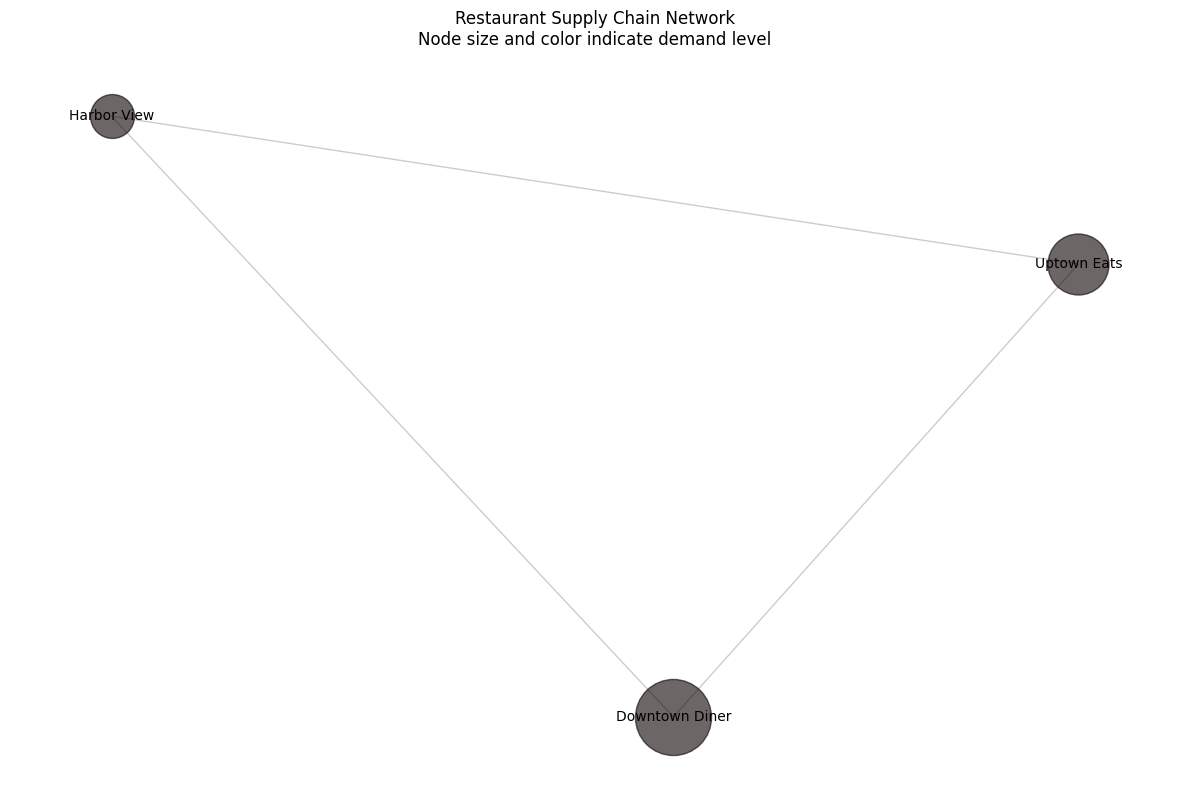


Optimal delivery routes from R1:
R1 → Uptown Eats: 5.06 units
R1 → Harbor View: 2.13 units


In [8]:
# Optimize and visualize delivery routes
# --- Example with a manually set start_restaurant_id ---
# target_restaurant_id = 'R1' # Or 'R2', 'R3', etc., depending on available IDs
# if target_restaurant_id not in optimizer.restaurants:
#     print(f"Error: Restaurant ID '{target_restaurant_id}' not found in optimizer.restaurants.")
#     print(f"Available IDs: {list(optimizer.restaurants.keys())}")
#     routes = {} # Set to empty or handle error appropriately
# else:
#     routes = optimizer.optimize_delivery_routes(target_restaurant_id)

# Default execution (uses 'R1' as per original)
start_node = 'R1'
if start_node not in optimizer.restaurants:
    print(f"Default start node '{start_node}' not found. Please check available restaurant IDs: {list(optimizer.restaurants.keys())}")
    routes = {}
else:
    routes = optimizer.optimize_delivery_routes(start_node)

optimizer.visualize_supply_chain() # Visualizes the entire network graph
print("\nOptimal delivery routes from " + start_node + ":") # Clarify which routes are shown
for dest, distance in routes.items(): # Assuming optimize_delivery_routes returns {dest: dist}
    if dest != start_node : # Don't show route to self if it's 0
        print(f'{start_node} → {optimizer.restaurants[dest].name if dest in optimizer.restaurants else dest}: {distance:.2f} units')

In [9]:
# Time of optimize delivery routes
start = time.perf_counter()
routes = optimizer.optimize_delivery_routes('R1')
elapsed = time.perf_counter() - start
print(f"Optimisation of delivery route execution time: {elapsed:.6f} seconds")

Optimisation of delivery route execution time: 0.000145 seconds


## 3. Menu Planning

Effective menu planning is critical for profitability and customer satisfaction. This section demonstrates how to optimize the daily menu for each restaurant based on specific constraints, primarily the daily budget. The underlying logic often involves techniques similar to the knapsack problem, where the goal is to select a combination of items that maximizes a defined objective (e.g., total profit, total calories/nutritional value, or a customer satisfaction score) without exceeding the allocated budget.

By running the cells below, you will:
*   Determine the optimal set of menu items for each restaurant.
*   See how the suggested menu adapts if you change the budget constraints. This interactive aspect allows you to explore trade-offs and make informed decisions about menu composition.

In [10]:
# Plan daily menu for each restaurant
menus = {}
for rest_id in optimizer.restaurants:
    menus[rest_id] = optimizer.plan_daily_menu(rest_id)
for rest, menu in menus.items():
    print(f'Menu for {optimizer.restaurants[rest].name if rest in optimizer.restaurants else rest}: {menu}')

# --- Example of planning menu for a single, specific restaurant with a custom budget ---
# target_restaurant_id_for_menu = 'R1' 
# custom_budget_for_menu = 900 # Example custom budget

# if target_restaurant_id_for_menu in optimizer.restaurants:
#     # Temporarily override restaurant's budget for this specific planning if needed,
#     # or ensure the optimizer.plan_daily_menu can take a budget override.
#     # For this example, we assume plan_daily_menu uses the restaurant's stored budget,
#     # so if you want to test a different budget, you'd ideally modify it on the Restaurant object first,
#     # or the plan_daily_menu method would need to accept an optional budget parameter.
#
#     # Assuming plan_daily_menu uses the budget stored in the restaurant object:
#     # original_budget = optimizer.restaurants[target_restaurant_id_for_menu].daily_budget
#     # optimizer.restaurants[target_restaurant_id_for_menu].daily_budget = custom_budget_for_menu
#     # single_menu = optimizer.plan_daily_menu(target_restaurant_id_for_menu)
#     # optimizer.restaurants[target_restaurant_id_for_menu].daily_budget = original_budget # Restore
#     # print(f"\nCustom menu for {optimizer.restaurants[target_restaurant_id_for_menu].name} with budget ${custom_budget_for_menu}: {single_menu}")
# else:
#     print(f"\nRestaurant ID '{target_restaurant_id_for_menu}' not found for custom menu planning.")

Menu for Downtown Diner: ['dessert', 'pasta', 'salad', 'burger', 'pizza']
Menu for Uptown Eats: ['dessert', 'pasta', 'salad', 'burger', 'pizza']
Menu for Harbor View: ['dessert', 'pasta', 'salad', 'burger', 'pizza']


In [11]:
# Time plan_daily_menu for each restaurant
for rest_id in optimizer.restaurants:
    start = time.perf_counter()
    menu = optimizer.plan_daily_menu(rest_id)
    elapsed = time.perf_counter() - start
    print(f"{rest_id}: plan_daily_menu execution time: {elapsed:.6f} seconds")

R1: plan_daily_menu execution time: 0.004099 seconds
R2: plan_daily_menu execution time: 0.002800 seconds
R3: plan_daily_menu execution time: 0.001302 seconds


## 4. Simulate Daily Demand

Understanding and predicting customer demand is essential for efficient operations. This section utilizes Monte Carlo simulation to forecast the daily demand for various menu items at each restaurant. Monte Carlo methods involve running a large number of random trials based on defined probability distributions (which can be derived from historical sales data or expert estimates) to model the inherent uncertainty in customer preferences and purchasing behavior.

The simulation will:
*   Generate a likely demand figure (e.g., number of units) for each menu item.
*   Account for factors like item popularity, location-specific trends, and random daily variations.
*   Present the results both textually (listing predicted demand per item) and visually (e.g., using bar charts to compare demand across items or restaurants). This helps in making better decisions regarding inventory stocking and production planning.

Simulated demand for Downtown Diner: {'pizza': 197, 'burger': 170, 'salad': 110, 'pasta': 138, 'dessert': 85}
Simulated demand for Uptown Eats: {'pizza': 167, 'burger': 145, 'salad': 96, 'pasta': 118, 'dessert': 70}
Simulated demand for Harbor View: {'pizza': 133, 'burger': 114, 'salad': 75, 'pasta': 91, 'dessert': 54}


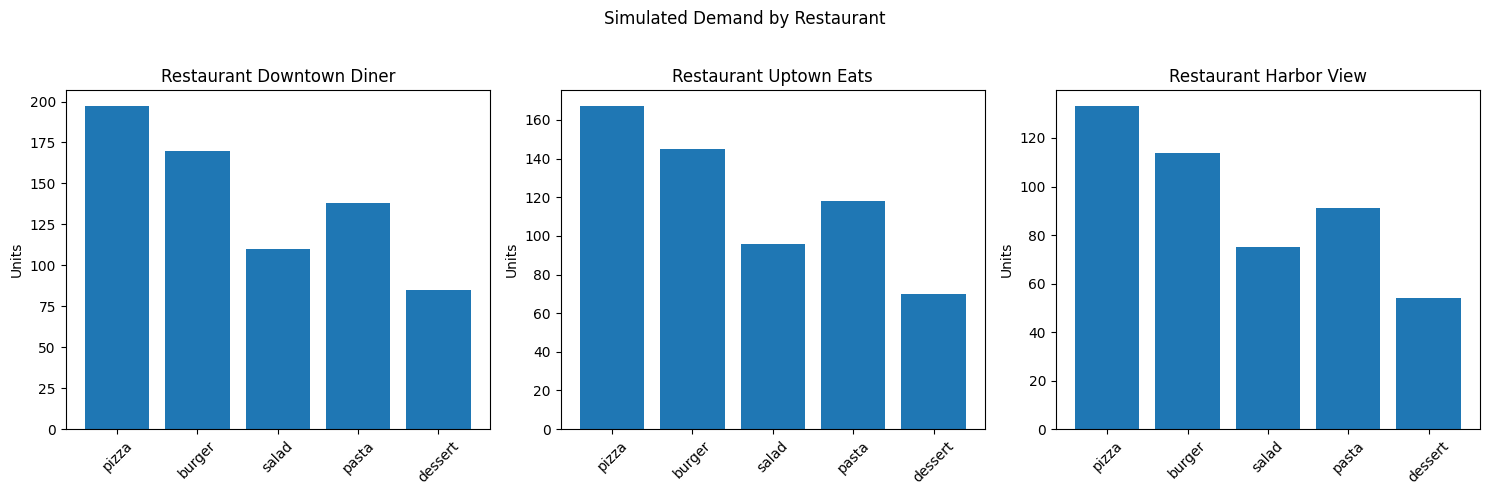

In [12]:
# Simulate daily demand for each restaurant
simulated_demand = {}
for rest_id in optimizer.restaurants:
    simulated_demand[rest_id] = optimizer.simulate_daily_demand(rest_id)
for rest, demand_data in simulated_demand.items():
    print(f'Simulated demand for {optimizer.restaurants[rest].name if rest in optimizer.restaurants else rest}: {demand_data}')

# Visualize demand side by side
num_restaurants = len(simulated_demand)
if num_restaurants > 0:
    fig, axes = plt.subplots(1, num_restaurants, figsize=(5 * num_restaurants, 5), squeeze=False) # Ensure axes is always 2D
    fig.suptitle('Simulated Demand by Restaurant')

    for idx, (rest, demand_data) in enumerate(simulated_demand.items()):
        ax = axes[0, idx]
        ax.bar(demand_data.keys(), demand_data.values())
        ax.set_title(f'Restaurant {optimizer.restaurants[rest].name if rest in optimizer.restaurants else rest}')
        ax.set_ylabel('Units')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=(0, 0, 1, 0.96)) # Adjust layout to make space for suptitle
    plt.show()
else:
    print("No restaurants available to simulate or visualize demand.")

# --- Example of simulating demand for a single, specific restaurant with custom number of days ---
# target_restaurant_id_for_demand = 'R1'
# custom_days_for_simulation = 15 # Example custom number of days

# if target_restaurant_id_for_demand in optimizer.restaurants:
#     single_simulated_demand = optimizer.simulate_daily_demand(target_restaurant_id_for_demand, days=custom_days_for_simulation)
#     print(f"\nSimulated demand for {optimizer.restaurants[target_restaurant_id_for_demand].name} over {custom_days_for_simulation} days: {single_simulated_demand}")
# else:
#     print(f"\nRestaurant ID '{target_restaurant_id_for_demand}' not found for custom demand simulation.")

In [13]:
# Time simulate_daily_demand for each restaurant
for rest_id in optimizer.restaurants:
	start = time.perf_counter()
	simulated_demand = optimizer.simulate_daily_demand(rest_id)
	elapsed = time.perf_counter() - start
	print(f"{rest_id}: simulate_daily_demand execution time: {elapsed:.6f} seconds")

R1: simulate_daily_demand execution time: 0.001268 seconds
R2: simulate_daily_demand execution time: 0.001488 seconds
R3: simulate_daily_demand execution time: 0.001287 seconds


## 5. Inventory Management

This section focuses on the crucial task of managing inventory levels. After simulating daily demand, the system updates the inventory for each restaurant. This involves reducing stock based on predicted sales and potentially highlighting items that require restocking.

Key aspects demonstrated here include:
*   **Inventory Updates:** Adjusting the recorded quantity of each item in stock.
*   **Priority for Restocking:** The system might implicitly (or explicitly, if using structures like a min-heap) prioritize items that have fallen below certain thresholds or are in high demand. A min-heap, for example, could be used to quickly identify items with the lowest stock levels, signaling an urgent need for replenishment.
*   **Visualization:** Inventory levels are often visualized (e.g., using bar charts) to provide a clear and immediate overview of the current stock situation for each restaurant, helping managers to quickly identify potential shortages or overstock situations.

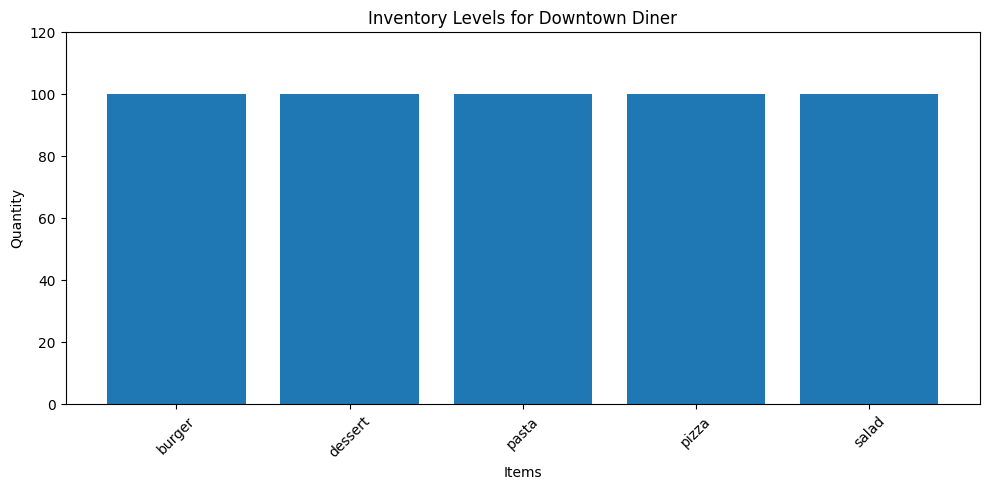

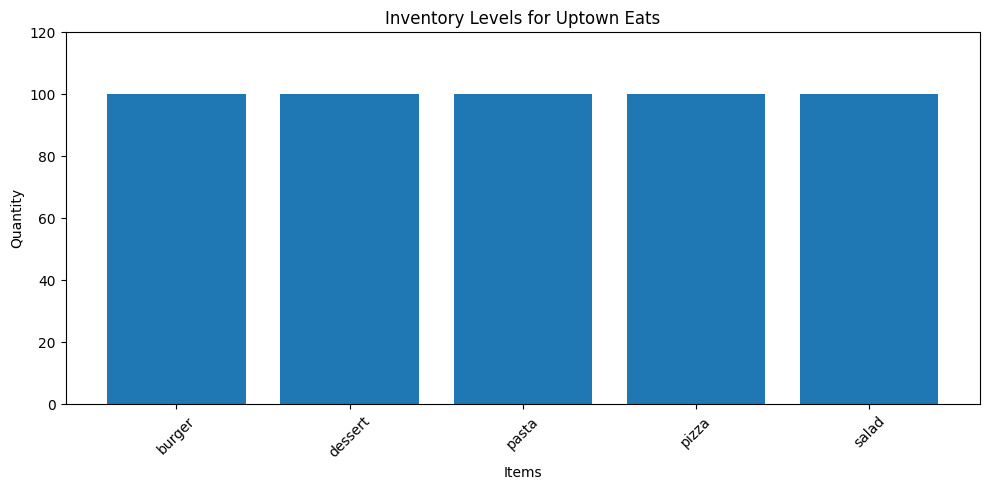

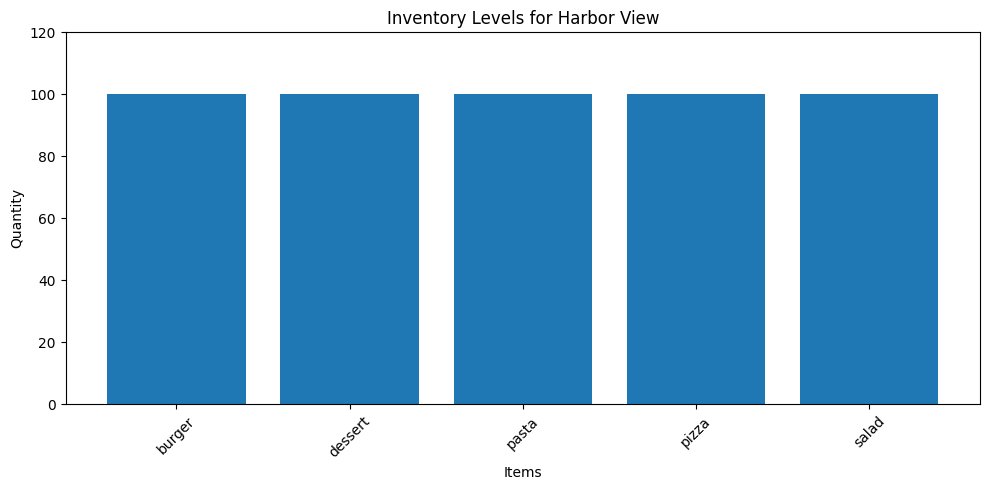

In [14]:
# Update and visualize inventory for each restaurant
# Set initial inventory to 100 for each item
base_inventory = {"burger": 100, "dessert": 100, "pasta": 100, "pizza": 100, "salad": 100}

for restaurant_id_iter in optimizer.restaurants.keys():
    # Set initial inventory for each restaurant
    optimizer.restaurants[restaurant_id_iter].inventory = base_inventory.copy()
    
    # Get inventory data using get_inventory method
    inventory_data = optimizer.get_inventory(restaurant_id_iter) if hasattr(optimizer, "get_inventory") else {}
    
    if inventory_data:
        # Create bar chart of inventory levels with consistent ordering
        items = sorted(inventory_data.keys())  # Sort items alphabetically
        quantities = [inventory_data[item] for item in items]
        
        plt.figure(figsize=(10, 5))
        plt.bar(items, quantities)
        plt.title(f'Inventory Levels for {optimizer.restaurants[restaurant_id_iter].name}')
        plt.xlabel('Items')
        plt.ylabel('Quantity')
        plt.xticks(rotation=45)
        plt.ylim(0, 120)  # Set y-axis limit slightly above max inventory
        plt.tight_layout()
        plt.show()
    else:
        print(f"No inventory data available to visualize for {optimizer.restaurants[restaurant_id_iter].name}")

# Example of updating inventory for a single restaurant with manually defined demand
# target_restaurant_id = 'R1'
# manual_demand = {"pizza": 5, "salad": 3}
# ...existing code...


Inventory levels for Downtown Diner:
  100: burger units in stock
  100: dessert units in stock
  100: pasta units in stock
  100: pizza units in stock
  100: salad units in stock


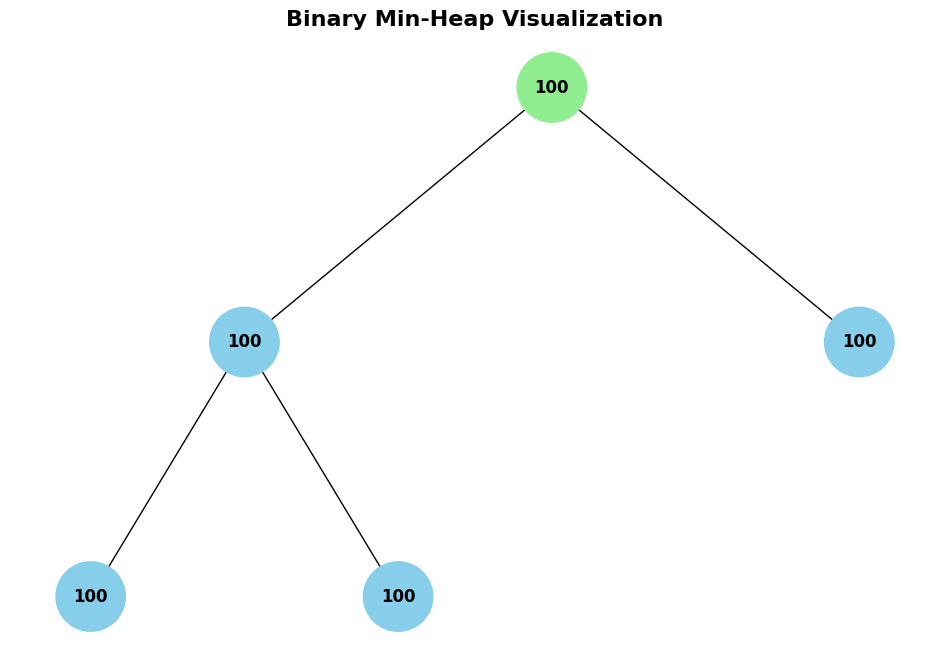

R1: update_inventory execution time: 0.117698 seconds

Inventory levels for Uptown Eats:
  150: burger units in stock
  150: dessert units in stock
  150: pasta units in stock
  150: pizza units in stock
  150: salad units in stock


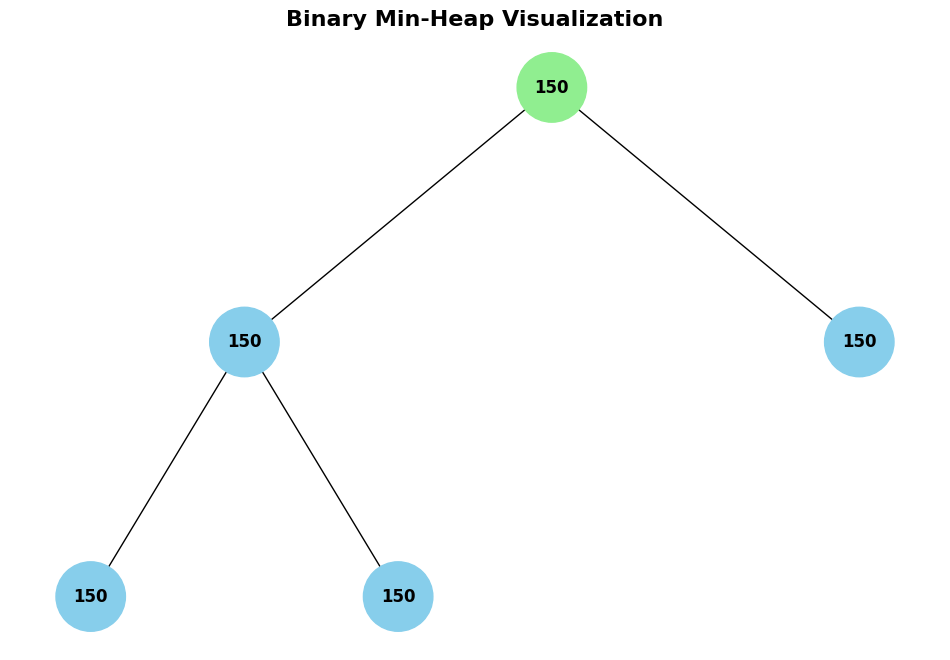

R2: update_inventory execution time: 0.081109 seconds

Inventory levels for Harbor View:
  80: burger units in stock
  80: dessert units in stock
  80: pasta units in stock
  80: pizza units in stock
  80: salad units in stock


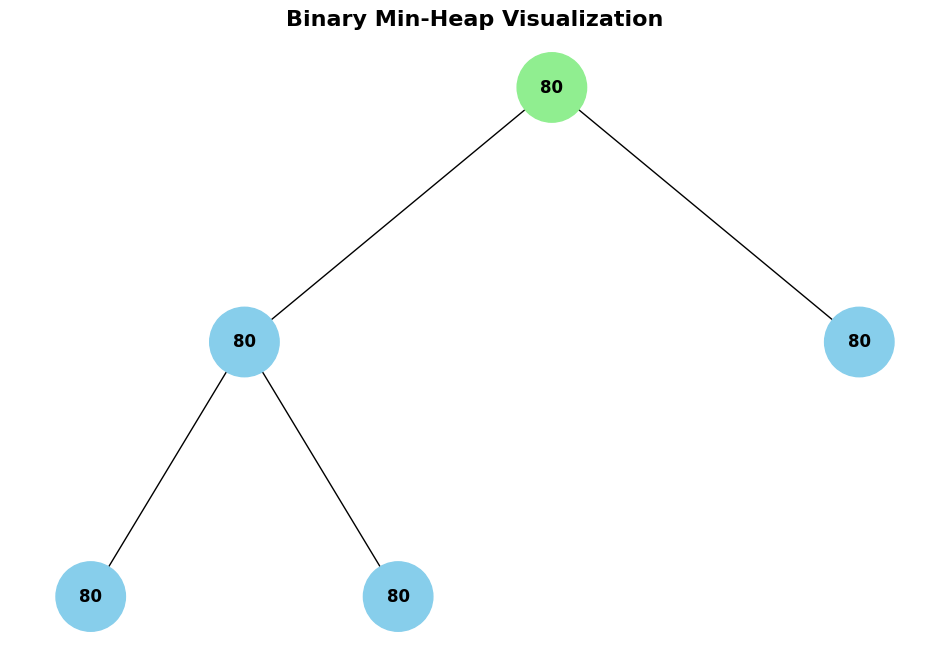

R3: update_inventory execution time: 0.087446 seconds


In [15]:
# Time update_inventory for each restaurant
for rest_id in optimizer.restaurants.keys():
	# Simulate demand for this restaurant
	demand = optimizer.simulate_daily_demand(rest_id)
	
	# Time the update_inventory operation
	start = time.perf_counter()
	optimizer.update_inventory(rest_id, demand)
	elapsed = time.perf_counter() - start
	print(f"{rest_id}: update_inventory execution time: {elapsed:.6f} seconds")

## 6. Order Processing

This part of the notebook demonstrates how customer orders are handled within the restaurant optimization system. Processing an order typically involves several key steps:

1.  **Order Validation:**
    *   Checking if the ordered items are currently on the restaurant's active menu.
    *   Verifying if there is sufficient inventory to fulfill the quantities requested for each item.
2.  **Inventory Update:** If the order is valid and can be fulfilled, the inventory levels for the sold items are decremented.
3.  **Cost Calculation:** The total cost of the order is computed based on the prices of the items.
4.  **Order Recording:** The details of the processed order (e.g., order ID, items, total cost, timestamp) are recorded, often in a sequential data structure like a linked list, which allows for efficient addition of new orders and maintains a chronological history.

This section will simulate these steps, showing whether an example order is processed successfully or fails due to issues like item unavailability or insufficient stock.

In [16]:
# Example: Process a sample order using the optimizer method
print("--- Processing Orders ---")

# Make sure inventory is sufficient for the first order by resetting/setting it.
# This ensures predictability for the example orders and maintains 100-unit consistency
base_inventory_for_processing = {"pizza": 100, "salad": 100, "dessert": 100, "burger": 100, "pasta": 100}  # All items set to 100 units
if 'R1' in optimizer.restaurants:
    optimizer.restaurants['R1'].inventory = base_inventory_for_processing.copy()
    print(f"Initial inventory for R1 set to: {optimizer.restaurants['R1'].inventory}")
else:
    print("Warning: Restaurant R1 not found. Order processing examples might fail.")

# 1. Successful order (using pre-defined items_ordered)
successful_order_items = {"pizza": 2, "salad": 1}
print(f"\nAttempting to process order: {successful_order_items} for R1")
if 'R1' in optimizer.restaurants:
    success1 = optimizer.process_order(restaurant_id="R1", items_ordered=successful_order_items)
    print(f"Order processing status: {'Success' if success1 else 'Failed'}")
    print(f"Inventory for R1 after attempt: {optimizer.restaurants['R1'].inventory}")
else:
    print("Skipping successful order example as R1 is not found.")


# 2. Failed order due to insufficient inventory (using pre-defined items_ordered)
# Note: Inventory for R1 would have been reduced by the previous successful order.
failed_order_items_insufficient = {"pizza": 20} # Current inventory for pizza might be 8 (10-2)
print(f"\nAttempting to process order: {failed_order_items_insufficient} for R1 (expecting failure due to inventory)")
if 'R1' in optimizer.restaurants:
    success2 = optimizer.process_order(restaurant_id="R1", items_ordered=failed_order_items_insufficient)
    print(f"Order processing status: {'Success' if success2 else 'Failed'}")
    print(f"Inventory for R1 after attempt: {optimizer.restaurants['R1'].inventory}")
else:
    print("Skipping failed order (inventory) example as R1 is not found.")

# --- Example of processing a manually defined order ---
manual_items_ordered_success = {"dessert": 1, "burger": 1}
target_restaurant_for_manual_order = 'R1'

print(f"\n--- Manual Order Processing for {target_restaurant_for_manual_order} ---")
if target_restaurant_for_manual_order in optimizer.restaurants:
    # Optionally, reset inventory for this specific test if needed
    # optimizer.restaurants[target_restaurant_for_manual_order].inventory = base_inventory_for_processing.copy()
    # print(f"Inventory for {target_restaurant_for_manual_order} before manual order: {optimizer.restaurants[target_restaurant_for_manual_order].inventory}")
    
    print(f"Attempting to process manual order: {manual_items_ordered_success}")
    manual_success = optimizer.process_order(restaurant_id=target_restaurant_for_manual_order, items_ordered=manual_items_ordered_success)
    print(f"Manual order processing status: {'Success' if manual_success else 'Failed'}")
    print(f"Inventory for {target_restaurant_for_manual_order} after manual order: {optimizer.restaurants[target_restaurant_for_manual_order].inventory}")
else:
    print(f"Restaurant ID '{target_restaurant_for_manual_order}' not found for manual order processing.")

# --- Example of a manual order that might fail due to item not on menu ---
manual_items_ordered_fail_menu = {"unknown_item": 1, "pizza": 1}
print(f"\nAttempting to process manual order with unknown item: {manual_items_ordered_fail_menu} for R1")
if 'R1' in optimizer.restaurants:
    # Ensure R1's inventory is sufficient for 'pizza' part if 'unknown_item' was valid
    # optimizer.restaurants['R1'].inventory["pizza"] = optimizer.restaurants['R1'].inventory.get("pizza", 0) + 10 # Ensure enough pizza
    fail_menu_status = optimizer.process_order(restaurant_id='R1', items_ordered=manual_items_ordered_fail_menu)
    print(f"Manual order (unknown item) processing status: {'Success' if fail_menu_status else 'Failed'}")
    print(f"Inventory for R1 after attempt: {optimizer.restaurants['R1'].inventory}")
else:
    print("Skipping manual order (unknown item) example as R1 is not found.")

--- Processing Orders ---
Initial inventory for R1 set to: {'pizza': 100, 'salad': 100, 'dessert': 100, 'burger': 100, 'pasta': 100}

Attempting to process order: {'pizza': 2, 'salad': 1} for R1
Order O1 processed successfully for Downtown Diner.
Order processing status: Success
Inventory for R1 after attempt: {'pizza': 98, 'salad': 99, 'dessert': 100, 'burger': 100, 'pasta': 100}

Attempting to process order: {'pizza': 20} for R1 (expecting failure due to inventory)
Order O2 processed successfully for Downtown Diner.
Order processing status: Success
Inventory for R1 after attempt: {'pizza': 78, 'salad': 99, 'dessert': 100, 'burger': 100, 'pasta': 100}

--- Manual Order Processing for R1 ---
Attempting to process manual order: {'dessert': 1, 'burger': 1}
Order O3 processed successfully for Downtown Diner.
Manual order processing status: Success
Inventory for R1 after manual order: {'pizza': 78, 'salad': 99, 'dessert': 99, 'burger': 99, 'pasta': 100}

Attempting to process manual order 

In [17]:
# Time the execution of the optimizer.process_order method

# Define a sample order and target restaurant for timing
# Ensure this order is feasible or set up inventory accordingly for a consistent test.
order_to_time = {"pasta": 1, "dessert": 1} # A simple, potentially new order for timing
restaurant_id_for_timing = 'R1'

print(f"\n--- Timing optimizer.process_order ---")
print(f"Attempting to process and time order: {order_to_time} for restaurant {restaurant_id_for_timing}")

if restaurant_id_for_timing not in optimizer.restaurants:
    print(f"Error: Restaurant {restaurant_id_for_timing} not found. Cannot time order processing.")
elif not all(item in optimizer.menu_items for item in order_to_time.keys()):
    print(f"Error: One or more items in {order_to_time} are not in the optimizer.menu_items. Cannot time order processing.")
else:
    # Optional: Ensure a known inventory state for the items in order_to_time.
    # This makes the timing test more consistent. 
    # For example, ensure 'pasta' and 'dessert' are in stock before timing:
    # if restaurant_id_for_timing in optimizer.restaurants:
    #     optimizer.restaurants[restaurant_id_for_timing].inventory["pasta"] = optimizer.restaurants[restaurant_id_for_timing].inventory.get("pasta", 0) + 5
    #     optimizer.restaurants[restaurant_id_for_timing].inventory["dessert"] = optimizer.restaurants[restaurant_id_for_timing].inventory.get("dessert", 0) + 5
    #     print(f"Inventory for {restaurant_id_for_timing} before timed order: {optimizer.get_inventory(restaurant_id_for_timing)}")

    start_time = time.perf_counter()
    success_status = optimizer.process_order(restaurant_id=restaurant_id_for_timing, items_ordered=order_to_time)
    end_time = time.perf_counter()

    elapsed_time = end_time - start_time
    
    print(f"Order processing status during timing: {'Success' if success_status else 'Failed'}")
    # If you want to see inventory changes due to the timed order, uncomment the next line:
    # if restaurant_id_for_timing in optimizer.restaurants:
    #     print(f"Inventory for {restaurant_id_for_timing} after timed order: {optimizer.get_inventory(restaurant_id_for_timing)}")
    print(f"Order execution time: {elapsed_time:.6f} seconds")


--- Timing optimizer.process_order ---
Attempting to process and time order: {'pasta': 1, 'dessert': 1} for restaurant R1
Order O4 processed successfully for Downtown Diner.
Order processing status during timing: Success
Order execution time: 0.001976 seconds


In [18]:
# Generate and display custom performance report
print("Restaurant Supply Chain Performance Report")
print("-" * 50)

# Report on restaurants
print("\n1. Restaurant Network:")
for rest_id, restaurant in optimizer.restaurants.items():
	print(f"- {rest_id}: {restaurant.name}")
	print(f"  Budget: ${restaurant.daily_budget:.2f}")
	print(f"  Storage Capacity: {restaurant.storage_capacity} units")

# Report on delivery routes
print("\n2. Delivery Routes:")
routes = optimizer.optimize_delivery_routes('R1')
print(f"Number of connected locations: {len(routes)}")
for src, distance in routes.items():
	print(f"- Route to {src}: {distance:.2f} units")

# Report on menu planning
print("\n3. Menu Planning:")
for rest_id, menu_items in menus.items():
	print(f"- {rest_id} Menu Items: {len(menu_items)} items")
	print(f"  Items: {', '.join(menu_items)}")

# Report on demand patterns
print("\n4. Demand Statistics:")
for rest_id in optimizer.restaurants:
	demand = optimizer.simulate_daily_demand(rest_id)
	total_demand = sum(demand.values())
	print(f"- {rest_id} Total Daily Demand: {total_demand} units")
	print(f"  Top item: {max(demand.items(), key=lambda x: x[1])[0]}")

print("\nReport generated successfully")

Restaurant Supply Chain Performance Report
--------------------------------------------------

1. Restaurant Network:
- R1: Downtown Diner
  Budget: $1000.00
  Storage Capacity: 100 units
- R2: Uptown Eats
  Budget: $1200.00
  Storage Capacity: 150 units
- R3: Harbor View
  Budget: $800.00
  Storage Capacity: 80 units

2. Delivery Routes:
Number of connected locations: 3
- Route to R1: 0.00 units
- Route to R2: 5.06 units
- Route to R3: 2.13 units

3. Menu Planning:
- R1 Menu Items: 5 items
  Items: dessert, pasta, salad, burger, pizza
- R2 Menu Items: 5 items
  Items: dessert, pasta, salad, burger, pizza
- R3 Menu Items: 5 items
  Items: dessert, pasta, salad, burger, pizza

4. Demand Statistics:
- R1 Total Daily Demand: 799 units
  Top item: pizza
- R2 Total Daily Demand: 547 units
  Top item: pizza
- R3 Total Daily Demand: 617 units
  Top item: pizza

Report generated successfully


In [19]:
# Time performance_report
start = time.perf_counter()
print("=" * 50)
print("Restaurant Supply Chain Performance Analysis")
print("=" * 50)

# Report on restaurants and network metrics
print("\n" + "=" * 20 + " Network Analysis " + "=" * 20)
for rest_id, restaurant in optimizer.restaurants.items():
    print(f"\n{'-' * 10} {restaurant.name} ({rest_id}) {'-' * 10}")
    print(f"Daily Budget: ${restaurant.daily_budget:.2f}")
    print(f"Storage Capacity: {restaurant.storage_capacity} units")
    
    # Get and report route optimizations
    routes = optimizer.optimize_delivery_routes(rest_id)
    print("\nDelivery Routes:")
    print(f"{'Destination':15} {'Distance':>10} {'% of Network':>15}")
    print("-" * 42)
    
    total_distance = sum(routes.values())
    for dest, distance in routes.items():
        if dest != rest_id:
            pct = (distance / total_distance) * 100
            print(f"{optimizer.restaurants[dest].name:15} {distance:10.2f} {pct:14.1f}%")

# Report on menu planning and revenue
print("\n" + "=" * 20 + " Menu Analysis " + "=" * 20)
for rest_id, menu_items in menus.items():
    print(f"\n{'-' * 10} {optimizer.restaurants[rest_id].name} {'-' * 10}")
    total_cost = sum(optimizer.menu_items[item]["cost"] for item in menu_items)
    print(f"Menu Items ({len(menu_items)}):")
    for item in menu_items:
        cost = optimizer.menu_items[item]["cost"]
        pct = (cost / total_cost) * 100
        print(f"- {item:15} ${cost:6.2f} ({pct:5.1f}%)")
    print(f"Total Menu Cost: ${total_cost:.2f}")

# Report on demand patterns and revenue projections
print("\n" + "=" * 20 + " Demand Analysis " + "=" * 20)
total_chain_revenue = 0
for rest_id in optimizer.restaurants:
    demand = optimizer.simulate_daily_demand(rest_id)
    print(f"\n{'-' * 10} {optimizer.restaurants[rest_id].name} {'-' * 10}")
    
    location_total = sum(count * optimizer.menu_items[item]["cost"] 
                        for item, count in demand.items())
    total_chain_revenue += location_total
    
    print(f"{'Item':12} {'Daily Units':>12} {'Revenue %':>12}")
    print("-" * 38)
    
    for item, count in sorted(demand.items(), 
                            key=lambda x: x[1] * optimizer.menu_items[x[0]]["cost"],
                            reverse=True):
        revenue = count * optimizer.menu_items[item]["cost"]
        revenue_share = (revenue / location_total) * 100
        print(f"{item:12} {count:12d} {revenue_share:11.1f}%")
    print(f"\nDaily Revenue: ${location_total:.2f}")

print(f"\nTotal Chain Daily Revenue: ${total_chain_revenue:.2f}")
print("\nPerformance report generated successfully")
elapsed = time.perf_counter() - start
print(f"Execution time: {elapsed:.6f} seconds")

Restaurant Supply Chain Performance Analysis

==================== Network Analysis ====================

---------- Downtown Diner (R1) ----------
Daily Budget: $1000.00
Storage Capacity: 100 units

Delivery Routes:
Destination       Distance    % of Network
------------------------------------------
Uptown Eats           5.06           70.4%
Harbor View           2.13           29.6%

---------- Uptown Eats (R2) ----------
Daily Budget: $1200.00
Storage Capacity: 150 units

Delivery Routes:
Destination       Distance    % of Network
------------------------------------------
Downtown Diner        5.06           47.2%
Harbor View           5.67           52.8%

---------- Harbor View (R3) ----------
Daily Budget: $800.00
Storage Capacity: 80 units

Delivery Routes:
Destination       Distance    % of Network
------------------------------------------
Downtown Diner        2.13           27.3%
Uptown Eats           5.67           72.7%

==================== Menu Analysis ===============

---

**Experiment and Learn!**

This notebook is designed as a hands-on learning tool. You are strongly encouraged to actively experiment:
*   **Rerun Cells:** Execute any code cell multiple times to see if results vary (especially for simulations).
*   **Change Parameters:** Go back to earlier cells (like initialization or specific optimization steps) and modify input values. For example:
    *   Adjust restaurant budgets in the `plan_daily_menu` section.
    *   Change the cost or calorie attributes of `FoodItem`s.
    *   Modify initial inventory levels before processing orders.
*   **Observe Responses:** Carefully note how the optimizer's outputs, textual summaries, and visualizations change in response to your modifications.

This iterative process of changing inputs and observing outcomes is key to developing a deeper understanding of how different variables and algorithms influence the overall supply chain optimization process.

## Performance Summary

The preceding code cells include measurements of the execution time for each major function within the Restaurant Supply Chain Optimizer (e.g., `optimize_delivery_routes`, `plan_daily_menu`, `simulate_daily_demand`). This performance data is valuable for several reasons:

*   **Identifying Bottlenecks:** If a particular function takes a disproportionately long time to execute, it might indicate a performance bottleneck that could be critical in a real-world, large-scale deployment.
*   **Algorithm Efficiency:** The timings provide insights into the practical computational cost of the algorithms used.
*   **Scalability Assessment:** While this notebook uses sample data, considering these execution times can help you think about how the system might scale as the number of restaurants, menu items, or simulation iterations increases.
*   **Comparative Analysis:** If you were to experiment with different algorithmic approaches for a particular task, these timings would serve as a basis for comparison.

Use these results to understand the computational demands of the optimizer and to consider areas where further optimization of the code itself might be beneficial for larger datasets or more complex scenarios.